## A. Predictors of Antler Size in 4.5- and 5.5-year-old Male White-tailed Deer

## I. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

## 2. Data

* These two datasets include data collected from 4.5- and 5.5-year-old male white-tailed deer from a captive colony at the Kerr Wildlife Management Area.  Two of the datasets includes parentage information, age, birth year, diet type, antler mass, and body mass of male white-tailed deer. The remaining two include the aforementioned variables and two additional variables, litter type and dam's age at birth of offspring.
* Variables: birth weight 'birth wt', mother 'DID', father 'SID', dietary intake 'Energy', birth year 'birthyr', dam's age at birth 'DaB', litter type 'Lit type', and year data was collected 'yr'.
* The variable 'Energy' is an ordinal variable representing two diets that differed in dietary energy where 'S'= 2.65 kcal/g and 'L'= 1.77 kcal. 
* The variable 'Lit type' is a categorical variable of either 'S' or 'M' where 'S' is a male born as a singleton and 'M' is a male born to a multiples litter (i.e., born to a litter of either twins or triplets).  
* The variable 'DaB' is a numerical variable representing the dam's (mother's) age at birth of offspring. 

## 3. Goals: 
* Assess the influence from environmental and  maternal factors on antler size of mature, 4.5- and 5.5-year-old, male white-tailed deer.

In [2]:
data_4 = pd.read_csv("Kerr_Data_4.5.csv")

data_4_ALL = pd.read_csv("Kerr_Data_4.5.csv")

data_5 = pd.read_csv("Kerr_Data_5.5.csv")

data_5_ALL = pd.read_csv("Kerr_Data_5.5.csv")

In [3]:
data_4_ALL.dtypes

SID             int64
DID             int64
ID              int64
birth wt      float64
Birthyr         int64
Birthyrcat     object
Energy         object
yr              int64
age           float64
antler kg     float64
bm kg         float64
DaB           float64
Lit type       object
dtype: object

## 4. Data Cleaning

The variables 'Birthyrcat', 'Age', and 'ID' will be dropped from all datasets. 'Age' will be dropped because we already know that older deer have larger antlers. 'DaB' and 'Lit type' will be dropped in 2 of the 4 datasets analyzed since they have some NaN values.  These two datasets were split so that (1) two datasets would have more data to analyze, and (2) the effects of 'DaB' and 'Lit type' could be analyzed. Thus, four datasets were analyzed separately.

In [4]:
data_4.drop(['age','Birthyrcat','ID','DaB','Lit type'],axis=1, inplace=True)

In [5]:
data_4_ALL.drop(['age','Birthyrcat','ID'],axis=1, inplace=True)

In [6]:
data_5.drop(['age','Birthyrcat','ID','DaB','Lit type'],axis=1, inplace=True)

In [7]:
data_5_ALL.drop(['age','Birthyrcat','ID'],axis=1, inplace=True)

In [8]:
data_4_ALL.dropna(how='any', inplace=True)

In [9]:
data_5_ALL.dropna(how='any', inplace=True)

In [10]:
# 'Energy' was encoded with label encoder because it is an ordinal variable.  'Lit type' was one-hot encoded because it is a categorical variable.

le = LabelEncoder()
one_hot = OneHotEncoder()

data_4['Energy'] = le.fit_transform(data_4['Energy'])

data_4_ALL['Energy'] = le.fit_transform(data_4_ALL['Energy'])
lit_4_encoded = one_hot.fit_transform(data_4_ALL[['Lit type']])
data_4_ALL[one_hot.categories_[0]] = lit_4_encoded.toarray()

data_5['Energy'] = le.fit_transform(data_5['Energy'])

data_5_ALL['Energy'] = le.fit_transform(data_5_ALL['Energy'])
lit_5_encoded = one_hot.fit_transform(data_5_ALL[['Lit type']])
data_5_ALL[one_hot.categories_[0]] = lit_5_encoded.toarray()

In [11]:
data_4_ALL = data_4_ALL.drop(columns=['Lit type'])
data_5_ALL = data_5_ALL.drop(columns=['Lit type'])

## 5. Creating the test and train data sets

In [12]:
X_a = data_4.drop(['antler kg'], axis=1)
y_a = data_4['antler kg']

In [13]:
X_b = data_4_ALL.drop(['antler kg'], axis=1)
y_b = data_4_ALL['antler kg']

In [14]:
X = data_5.drop(['antler kg'], axis=1)
y = data_5['antler kg']

In [15]:
X_1 = data_5_ALL.drop(['antler kg'], axis=1)
y_1 = data_5_ALL['antler kg']

In [16]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2,random_state=25)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2,random_state=25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=25)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2,random_state=25)

## 5. Modeling

### A. Random Forest Regressor

#### a. 4.5-year-olds

In [17]:
rfc_a = RandomForestRegressor(random_state=0)

rfc_a.fit(X_train_a, y_train_a)

y_pred_rfc_a=rfc_a.predict(X_test_a)

print(mean_absolute_error(y_test_a,y_pred_rfc_a))

0.26528900000000016


In [18]:
rfc_b = RandomForestRegressor(random_state=0)

rfc_b.fit(X_train_b, y_train_b)

y_pred_rfc_b=rfc_b.predict(X_test_b)

print(mean_absolute_error(y_test_b,y_pred_rfc_b))

0.20506907692307688


#### 5.5-year-olds

In [19]:
rfc = RandomForestRegressor(random_state=0)

rfc.fit(X_train, y_train)

y_pred_rfc=rfc.predict(X_test)

print(mean_absolute_error(y_test,y_pred_rfc))

0.4140486249999999


In [20]:
rfc_1 = RandomForestRegressor(random_state=0)

rfc_1.fit(X_train_1, y_train_1)

y_pred_rfc_1=rfc_1.predict(X_test_1)

print(mean_absolute_error(y_test_1,y_pred_rfc_1))

0.2981956666666658


### B. Gradient Boosting Regressor

#### a. 4.5-year-olds

In [21]:
gb_a = GradientBoostingRegressor(random_state = 0)

gb_a.fit(X_train_a, y_train_a)

y_pred_gb_a = gb_a.predict(X_test_a)

print(mean_absolute_error(y_test_a,y_pred_gb_a))

0.25107367475314996


In [22]:
gb_b = GradientBoostingRegressor(random_state = 0)

gb_b.fit(X_train_b, y_train_b)

y_pred_gb_b = gb_b.predict(X_test_b)

print(mean_absolute_error(y_test_b,y_pred_gb_b))

0.26337179686013923


#### b. 5.5-year-olds

In [23]:
gb_1 = GradientBoostingRegressor(random_state = 0)

gb_1.fit(X_train_1, y_train_1)

y_pred_gb_1 = gb_1.predict(X_test_1)

print(mean_absolute_error(y_test_1,y_pred_gb_1))

0.4403141262208932


In [24]:
gb = GradientBoostingRegressor(random_state = 0)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print(mean_absolute_error(y_test,y_pred_gb))

0.33799443603021817


### C. Model selection.
* Random forest regressor performed best (i.e., had a smaller MAE) on the larger datasets. Gradient boosting regressor performed best on the smaller datasets (i.e., datasets that did not include the litter of the male ('Lit type') or dam's age at birth of offspring ('DaB')

## 6. Important Features

### A. 4.5-year-olds

In [25]:
feat_importances_a = pd.DataFrame(gb_a.feature_importances_, index=X_train_a.columns, columns=["Importance"])
feat_importances_a.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_a

,Importance
birth wt,0.346729
bm kg,0.259021
SID,0.149850
DID,0.116097
Energy,0.112963
Birthyr,0.009426
yr,0.005913


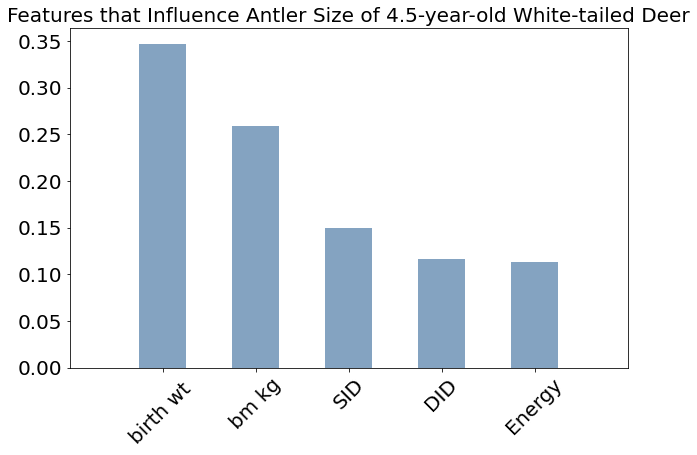

In [26]:
feature_names_a = [col for col in X_train_a]
feature_importances_a = gb_a.feature_importances_
indices_a = np.argsort(feature_importances_a)[::-1]
n = 5 # maximum feature importances displayed
idx_a = indices_a[0:n] 
std = np.std(gb_a.feature_importances_)

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features that Influence Antler Size of 4.5-year-old White-tailed Deer", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances_a[idx_a], color=(0.2, 0.4, 0.6, 0.6), width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names_a[id] for id in idx_a], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()

In [27]:
feat_importances_b = pd.DataFrame(rfc_b.feature_importances_, index=X_train_b.columns, columns=["Importance"])
feat_importances_b.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_b

,Importance
bm kg,0.343208
birth wt,0.207928
SID,0.149965
Energy,0.112743
DID,0.100599
DaB,0.042868
Birthyr,0.017719
yr,0.017650
M,0.004670
S,0.002650


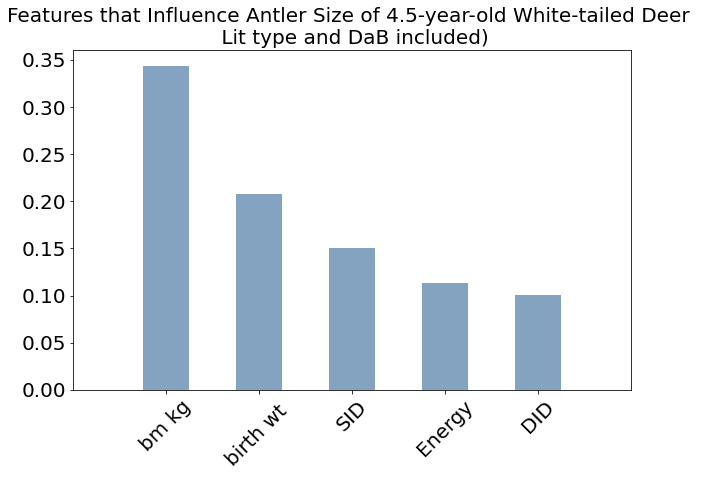

In [28]:
feature_names_b = [col for col in X_train_b]
feature_importances_b = rfc_b.feature_importances_
indices_b = np.argsort(feature_importances_b)[::-1]
n = 5 # maximum feature importances displayed
idx_b = indices_b[0:n] 
std = np.std(gb_b.feature_importances_)

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features that Influence Antler Size of 4.5-year-old White-tailed Deer \n Lit type and DaB included)", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances_b[idx_b], color=(0.2, 0.4, 0.6, 0.6), width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names_b[id] for id in idx_b], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()

### B. 5.5-year-olds

In [29]:
feat_importances = pd.DataFrame(gb.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

,Importance
birth wt,0.294204
SID,0.269872
bm kg,0.188775
DID,0.174011
Energy,0.027935
yr,0.023300
Birthyr,0.021904


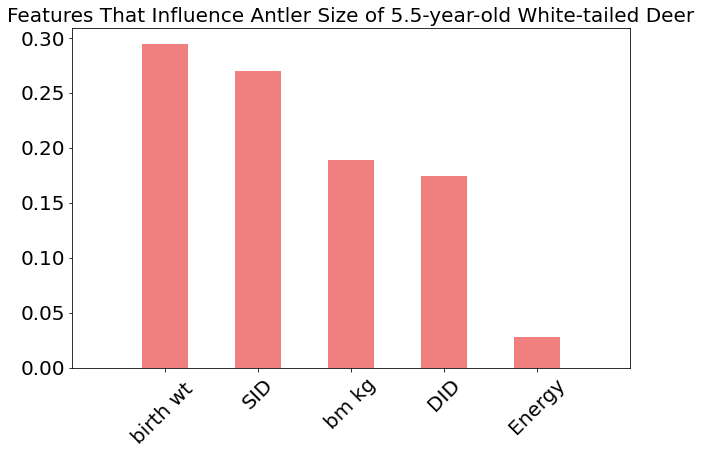

In [30]:
feature_names = [col for col in X_train]
feature_importances = gb.feature_importances_
indices = np.argsort(feature_importances)[::-1]
n = 5 # maximum feature importances displayed
idx = indices[0:n] 
std = np.std(gb.feature_importances_)

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features That Influence Antler Size of 5.5-year-old White-tailed Deer", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances[idx], color="lightcoral", width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names[id] for id in idx], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()



In [31]:
feat_importances_1 = pd.DataFrame(rfc_1.feature_importances_, index=X_train_1.columns, columns=["Importance"])
feat_importances_1.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_1

,Importance
SID,0.231646
bm kg,0.187980
birth wt,0.177680
DID,0.118671
Energy,0.098906
S,0.048314
DaB,0.043503
M,0.032557
Birthyr,0.030524
yr,0.030217


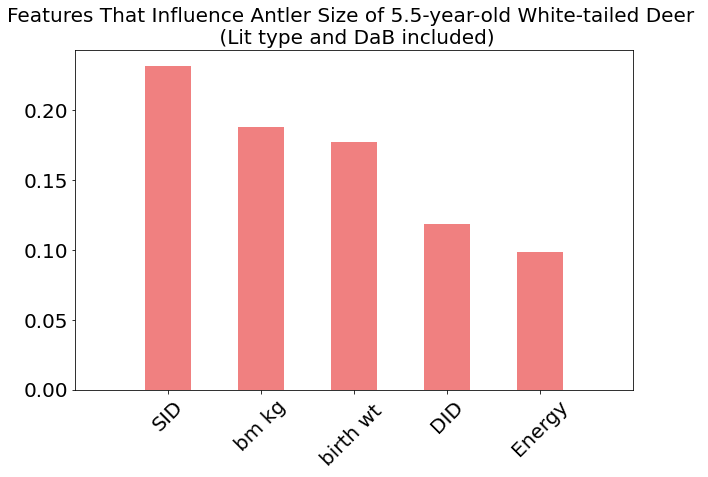

In [32]:
feature_names_1 = [col for col in X_train_1]
feature_importances_1 = rfc_1.feature_importances_
indices_1 = np.argsort(feature_importances_1)[::-1]
n = 5 # maximum feature importances displayed
idx_1 = indices_1[0:n] 
std = np.std(gb_1.feature_importances_)

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features That Influence Antler Size of 5.5-year-old White-tailed Deer \n (Lit type and DaB included)", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances_1[idx_1], color="lightcoral", width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names_1[id] for id in idx_1], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()

## 7. Implications

* DaB and Lit Type were not important feature. Therefore, their output will be ignored in favor of the larger dataset where they were not included as predictors

### A. 4.5-year-olds
* Antler size of 4.5-year-old males is most influenced by the birth weight of the male. What's most surprising here is that, when it comes to determing antler size of mature males, it didn't really matter whether males had been eating a low or high energy diet ('Energy') throughout their life.  

###  B. 5.5-year-olds
* Like in 4.5-year-olds, antler size of 5.5-year-old males is most influenced by the birth weight of the male. The father of the individual male (SID) was the second highest ranked feature.  Also, eating a low or high energy diet ('Energy') was not an important feature in predicting antler size of 5.5-year-olds.